In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [19]:
file=pd.read_csv("Advertising.csv")  #uploading the file
df=pd.DataFrame(file)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
# now cleaning the data first
df.dropna()   #removing rows with missing values
df.drop_duplicates()  #removing the duplicates also


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [59]:
print(f"Shape: {df.shape}")
column=df.columns
print(column)

# by this i am splitting the features accordingly
def split_features_target(df, target_col):
    target = df[target_col]                   # your target
    features = df.drop(columns=[target_col])  # everything else
    return features, target

X, y = split_features_target(df, "Sales")

print("Features shape:", X.shape)
print("Target shape:", y.shape)



Shape: (200, 4)
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [55]:
#calling down the linear_regression model
model=LinearRegression()
model.fit(X,y)
y_predicted=model.predict(X)


Scatter Plots (EDA)


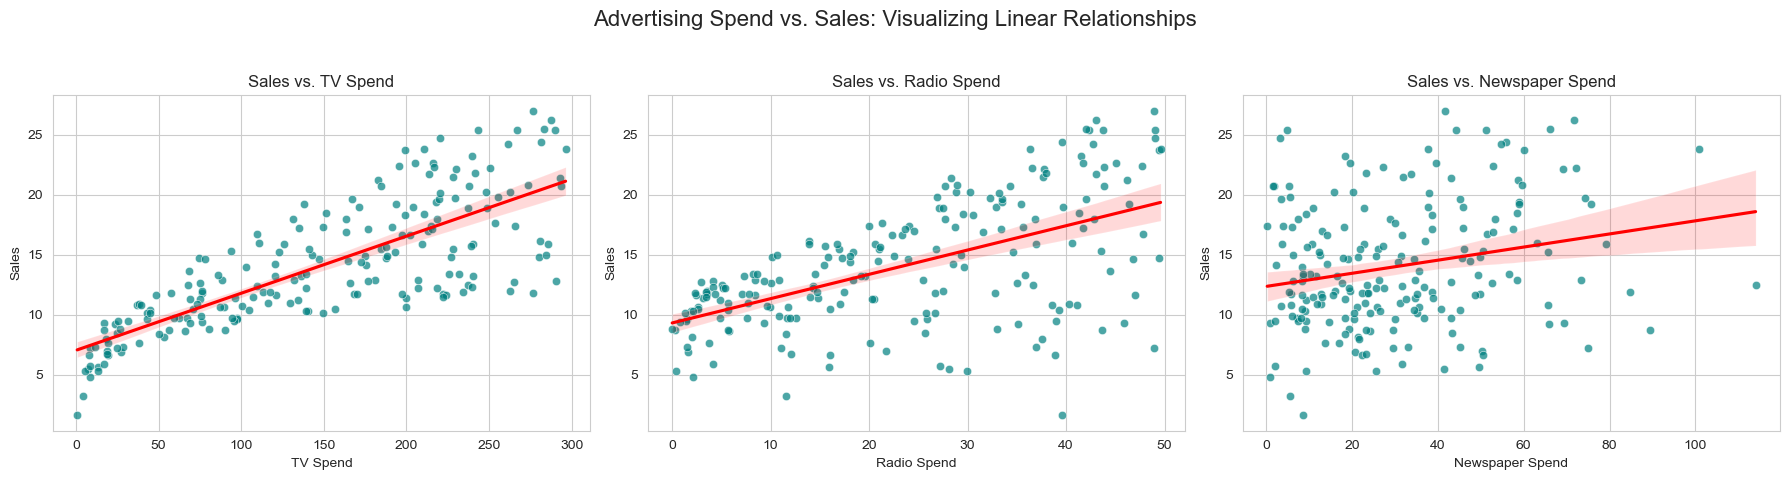

In [94]:
# now working on the visualization 
#scatter plot
sns.set_style("whitegrid")
print("Scatter Plots (EDA)")
features = X   # assigning the features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Advertising Spend vs. Sales: Visualizing Linear Relationships', fontsize=16)

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['Sales'], ax=axes[i], color='teal', alpha=0.7)
    sns.regplot(x=df[feature], y=df['Sales'], ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Sales vs. {feature} Spend')
    axes[i].set_xlabel(f'{feature} Spend')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Correlation Heatmap (EDA)


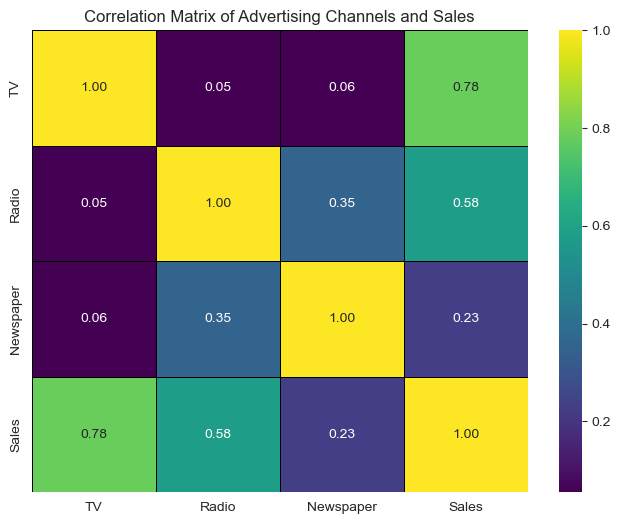

In [95]:
print("Correlation Heatmap (EDA)")
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
# sns.heatmap generates a color-coded matrix
sns.heatmap(corr_matrix, 
            annot=True, # Show the correlation values on the plot
            fmt=".2f", # Format the annotations to two decimal places
            cmap='viridis', # Choose a color map (viridis is good for perception)
            linewidths=0.5, 
            linecolor='black')
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

Generating Actual vs. Predicted Plot...


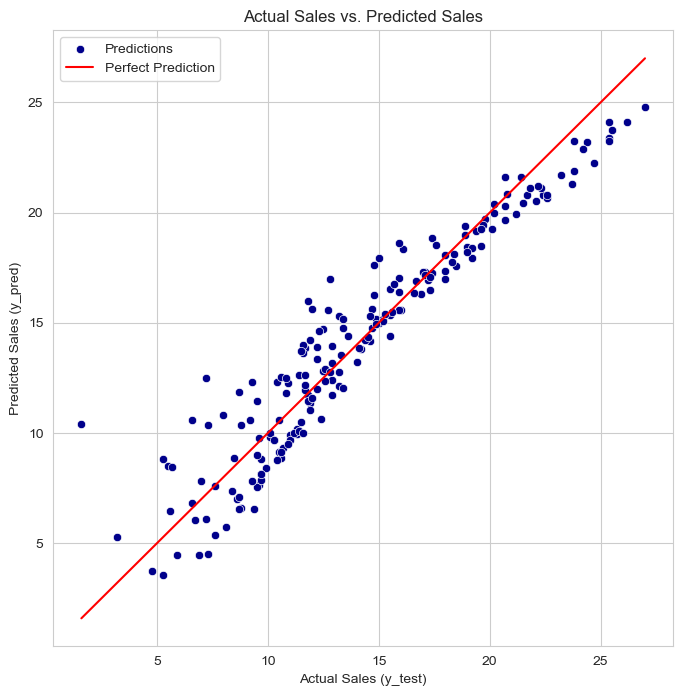

In [96]:
print("Generating Actual vs. Predicted Plot...")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y, y=y_predicted, color='darkblue', label='Predictions')
max_val = max(y.max(), y_predicted.max())
min_val = min(y.min(), y_predicted.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='Perfect Prediction')

plt.title('Actual Sales vs. Predicted Sales')
plt.xlabel('Actual Sales (y_test)')
plt.ylabel('Predicted Sales (y_pred)')
plt.legend()
plt.show()

Residuals Distribution


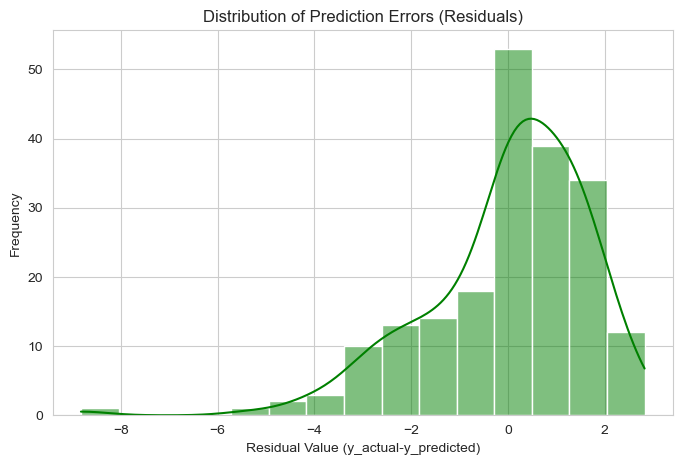

In [99]:
print("Residuals Distribution")
residuals = y - y_predicted
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=15, kde=True, color='green')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Residual Value (y_actual-y_predicted)')
plt.ylabel('Frequency')
plt.show()

Residuals vs. Predicted Plot


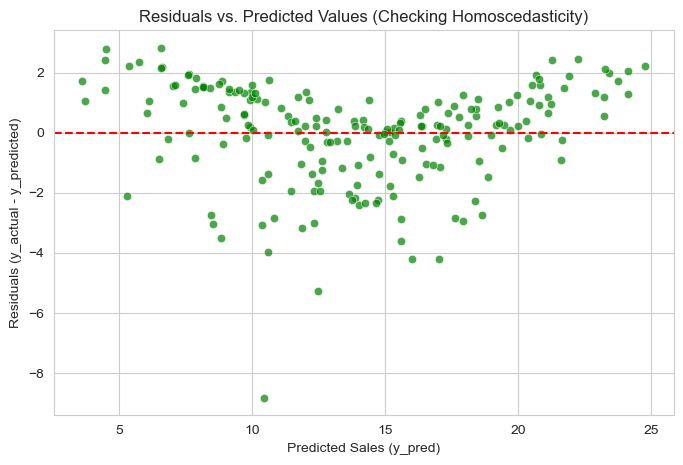

In [103]:
print("Residuals vs. Predicted Plot")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_predicted, y=residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Residuals vs. Predicted Values (Checking Homoscedasticity)')
plt.xlabel('Predicted Sales (y_pred)')
plt.ylabel('Residuals (y_actual - y_predicted)')
plt.show()

In [89]:
r2 = r2_score(y, y_predicted)
r2*=100
print(f"Model success rate: {r2} %")

Model success rate: 89.72106381789521 %
